In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict, cross_validate, GridSearchCV
import xgboost as xgb
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score


train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')
combine = [train_dataset, test_dataset]

In [2]:
# train_dataset['isCabinNull'] = train_dataset['Cabin'].isnull()*1
# train_dataset.head()

In [3]:
# test_dataset['isCabinNull'] = test_dataset['Cabin'].isnull()*1
# test_dataset.head()

In [4]:
train_dataset=train_dataset.drop("Ticket",axis=1)
train_dataset=train_dataset.drop("Cabin",axis=1)

train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [5]:
test_dataset=test_dataset.drop("Ticket",axis=1)
test_dataset=test_dataset.drop("Cabin",axis=1)

test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [6]:
train_dataset['FamilySize'] = train_dataset['SibSp'] + train_dataset['Parch'] + 1
    
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [7]:
test_dataset['FamilySize'] = test_dataset['SibSp'] + test_dataset['Parch'] + 1
    
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [8]:
def categorise(row):  
    if row > 1 and row < 5:
        return 1
    return 0
train_dataset['NormalFamilySize'] = train_dataset['FamilySize'].apply(categorise)
    
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,NormalFamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,0


In [9]:
def categorise(row):  
    if row > 1 and row < 5:
        return 1
    return 0
test_dataset['NormalFamilySize'] = test_dataset['FamilySize'].apply(categorise)
    
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,NormalFamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3,1


In [10]:

data = [train_dataset, test_dataset]

for each in data:
    meanAge = train_dataset["Age"].mean()
    stdAge = test_dataset["Age"].std()
    isNull = each["Age"].isnull().sum()
    # print(isNull)
    # rand_age = np.random.randint(meanAge - stdAge, meanAge + stdAge)
    randomAgeGenerator = np.random.randint(meanAge - stdAge, meanAge + stdAge, size = isNull)
    print(randomAgeGenerator)
    age_copy = each["Age"].copy()
    age_copy[np.isnan(age_copy)] = randomAgeGenerator
    each["Age"] = age_copy
    each["Age"] = train_dataset["Age"].astype(int)
    

[30 20 37 24 38 38 23 16 16 38 16 38 32 19 35 34 28 18 25 41 27 34 15 23
 15 15 23 15 29 35 40 21 16 16 31 34 34 23 23 19 17 39 36 23 35 36 30 36
 28 34 34 32 15 36 21 39 25 20 37 19 23 15 33 24 34 19 28 38 19 15 33 28
 33 22 25 16 33 41 28 17 16 39 34 35 36 27 16 29 29 32 38 34 34 19 28 30
 30 31 23 30 23 41 22 26 26 16 27 28 40 21 34 16 33 20 41 38 19 33 21 22
 27 23 18 34 23 18 25 34 37 28 36 33 18 16 19 38 23 37 26 27 25 17 34 30
 21 31 38 32 16 24 27 16 19 16 28 34 38 24 40 32 37 31 15 42 33 22 19 24
 20 33 32 29 33 29 18 27 38]
[41 25 22 37 20 24 17 36 41 27 16 26 35 26 29 39 38 24 24 35 23 33 34 18
 19 30 37 31 39 39 29 16 39 30 25 21 18 26 21 15 26 32 35 29 32 19 17 29
 15 32 35 21 30 29 39 40 15 24 39 31 36 41 32 21 42 16 37 18 19 19 18 33
 30 17 25 25 19 32 23 38 35 26 31 20 37 42]


In [11]:
# train_dataset["Embarked"] = train_dataset["Embarked"].fillna('C')
train_dataset["Embarked"] = train_dataset["Embarked"].fillna('S')

train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,NormalFamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,1,0


In [12]:
test_dataset = test_dataset.fillna(test_dataset['Fare'].mean())

In [13]:
train_dataset=train_dataset.drop("PassengerId",axis=1)
train_dataset=train_dataset.drop("Name",axis=1)

train_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,NormalFamilySize
0,0,3,male,22,1,0,7.2500,S,2,1
1,1,1,female,38,1,0,71.2833,C,2,1
2,1,3,female,26,0,0,7.9250,S,1,0
3,1,1,female,35,1,0,53.1000,S,2,1
4,0,3,male,35,0,0,8.0500,S,1,0


In [14]:
test_dataset=test_dataset.drop("PassengerId",axis=1)
test_dataset=test_dataset.drop("Name",axis=1)

test_dataset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,NormalFamilySize
0,3,male,22,0,0,7.8292,Q,1,0
1,3,female,38,1,0,7.0000,S,2,1
2,2,male,26,0,0,9.6875,Q,1,0
3,3,male,35,0,0,8.6625,S,1,0
4,3,female,35,1,1,12.2875,S,3,1


In [15]:
le = LabelEncoder()
train_dataset["Sex"]= le.fit_transform(train_dataset["Sex"])
print(train_dataset["Sex"])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64


In [16]:
test_dataset["Sex"]= le.fit_transform(test_dataset["Sex"])
print(test_dataset["Sex"])

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int64


In [17]:
train_dataset["Embarked"]= le.fit_transform(train_dataset["Embarked"])
print(train_dataset["Embarked"])

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64


In [18]:
test_dataset["Embarked"]= le.fit_transform(test_dataset["Embarked"])
print(test_dataset["Embarked"])

0      1
1      2
2      1
3      2
4      2
      ..
413    2
414    0
415    2
416    2
417    0
Name: Embarked, Length: 418, dtype: int64


In [19]:
X_train = train_dataset.drop("Survived", axis=1)
Y_train = train_dataset["Survived"]
X_test = test_dataset.copy()

In [20]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
log_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.81

In [22]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=16, metric='minkowski', 
                           metric_params=None, n_jobs=1, n_neighbors=6, p=2, 
                           weights='uniform')
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.51

In [23]:
svc = SVC(probability = True, kernel = 'rbf', random_state = 0)
svc.fit(X_train, Y_train)
svc_pred = svc.predict(X_test)
svc.score(X_train, Y_train)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.5

In [24]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
gaussian_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.68

In [59]:
decision_tree = DecisionTreeClassifier(max_depth = 20, random_state = None, min_samples_leaf = 1, max_features = 13)
decision_tree.fit(X_train, Y_train)
dt_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

96.18

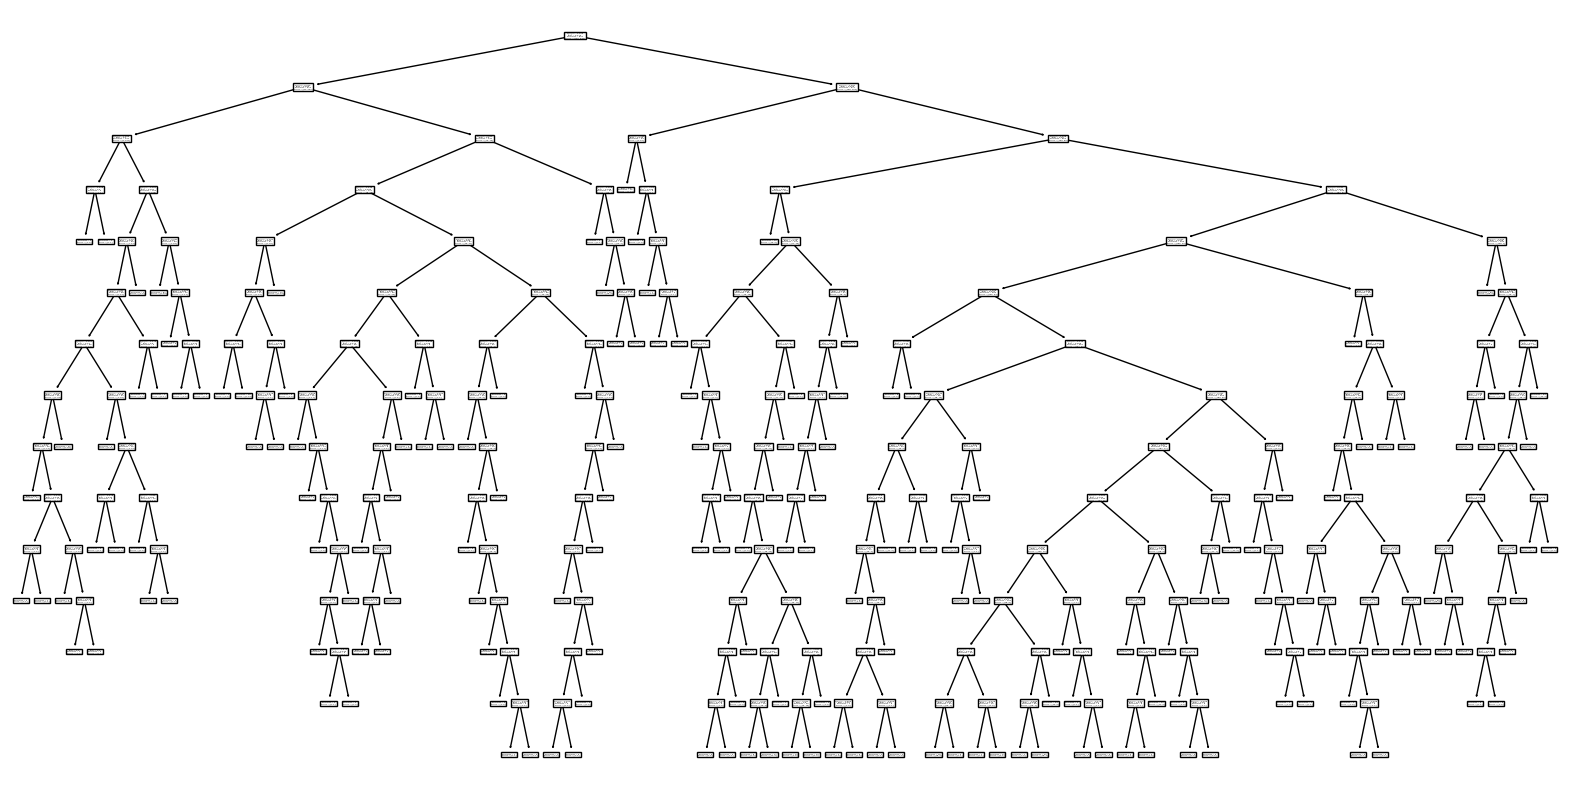

In [60]:
plt.figure(figsize=(20,10))
a = plot_tree(decision_tree)

In [56]:
scores = cross_val_score(decision_tree, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())

Scores: [0.81111111 0.84269663 0.7752809  0.84269663 0.84269663 0.78651685
 0.78651685 0.78651685 0.85393258 0.80898876]
Mean: 0.8136953807740325


In [57]:
random_forest = RandomForestClassifier(max_depth=12, n_estimators=50, n_jobs=-1, random_state=None)
random_forest.fit(X_train, Y_train)
rf_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

96.18

In [58]:
scores = cross_val_score(random_forest, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())

Scores: [0.72222222 0.84269663 0.74157303 0.86516854 0.88764045 0.82022472
 0.83146067 0.78651685 0.83146067 0.83146067]
Mean: 0.8160424469413234


In [29]:
xgb_model = xgb.XGBClassifier()

xgb_model.fit(X_train, Y_train)
xgb_pred = xgb_model.predict(X_test)

acc_xgb = round(xgb_model.score(X_train, Y_train) * 100, 2)
acc_xgb

96.07

In [30]:
mlp_model = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(11, 11, 11), random_state=1, max_iter = 1000)

mlp_model.fit(X_train, Y_train)
mlp_pred = xgb_model.predict(X_test)

acc_mlp = round(mlp_model.score(X_train, Y_train) * 100, 2)
acc_mlp

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


93.27

In [31]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'XGBoost', 
              'Decision Tree', 'MLP'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_xgb, acc_decision_tree, acc_mlp]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.32
6,Decision Tree,98.09
5,XGBoost,96.07
7,MLP,93.27
1,KNN,84.51
0,Support Vector Machines,83.50
2,Logistic Regression,80.81
4,Naive Bayes,78.68


In [32]:
sft_voting = VotingClassifier (estimators = [
    ('LogisticRegression', logreg),
    ('SVC', svc),
    ('KNN', knn),
    ('Gaussian', gaussian),
#    ('perceptron', perceptron),
#    ('Linear SVC', linear_svc),
    ('Decision Tree', decision_tree),
    ('RF', random_forest),
#    ('SGD', sgd),
    ('xgb_model', xgb_model),
    ('mlp_model', mlp_model)
], weights = [
    1,
    8,
    2,
    1,
    2,
    2,
    2,
    2
], voting = 'soft')

sft_voting.fit(X_train, Y_train)
soft_pred = sft_voting.predict(X_test)
acc_soft = round(sft_voting.score(X_train, Y_train) * 100, 2)
acc_soft

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


90.35

In [33]:
#experiment section
import statistics

experiment_pred = []
for index in range(0,418):
    list_of_pred = [
        log_pred[index],
        knn_pred[index],
        svc_pred[index],
        gaussian_pred[index],
        dt_pred[index],
        rf_pred[index],
        xgb_pred[index],
        mlp_pred[index]
#         soft_pred[index]
    ]
#     list_of_pred.sort()
    median_pred = statistics.median(list_of_pred)
#     print(list_of_pred)
    if median_pred == 0.5:
        median_pred = knn_pred[index]
#         median_pred = svc_pred[index]
    print(median_pred)
    experiment_pred.append(int(median_pred))

0.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0
1.0
0.0
1.0
0.0
1
0.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
1
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
0
0.0
1
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
1
0.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
0
1.0
0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0


In [34]:
submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = experiment_pred
submission.to_csv('submission.csv', index=False)